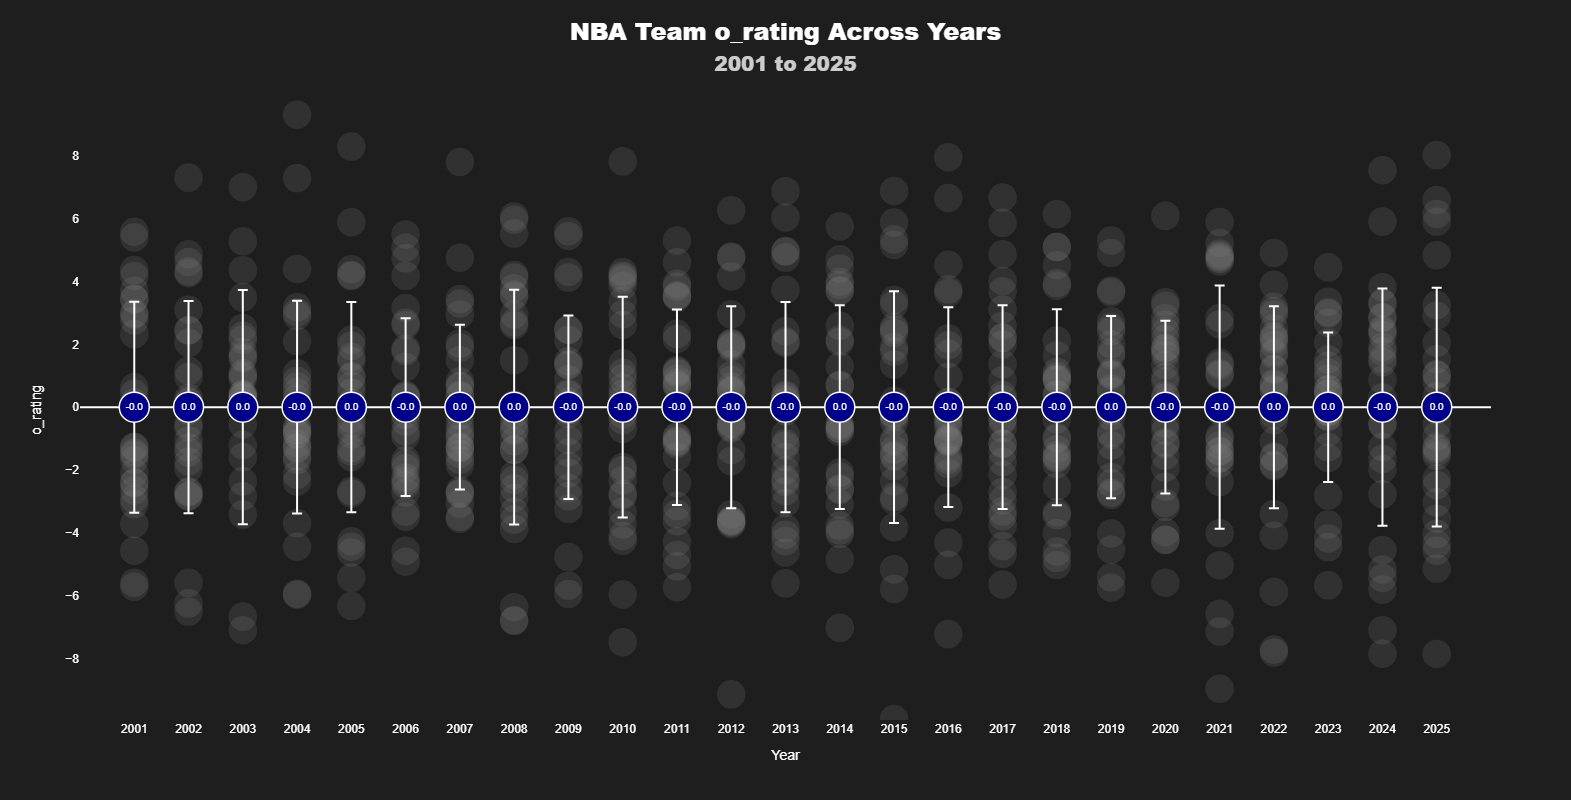

In [17]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

def get_multi_year_data(start_year, end_year):
    """
    Retrieve team performance data across multiple years
    """
    url='https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/team_totals/all_teamyears.csv'
    
    df = pd.read_csv(url)
   
    return df


def create_multi_year_dot_plot(metric_column, start_year=2014, end_year=2025,team=None,rel=False):
    """
    Create a dot plot showing team performance across multiple years
    """
    # NBA team colors dictionary
    team_colors = {
        'BOS': '#007A33',  # Boston Celtics - Green
        'BKN': '#000000',  # Brooklyn Nets - Black
        'NYK': '#006BB6',  # New York Knicks - Blue
        'PHI': '#006BB6',  # Philadelphia 76ers - Blue
        'TOR': '#CE1141',  # Toronto Raptors - Red
    
        ## Central Division
        'CHI': '#CE1141',  # Chicago Bulls - Red
        'CLE': '#860038',  # Cleveland Cavaliers - Wine
        'DET': '#C8102E',  # Detroit Pistons - Red
        'IND': '#002D62',  # Indiana Pacers - Navy
        'MIL': '#00471B',  # Milwaukee Bucks - Green
    
        ## Southeast Division
        'ATL': '#E03A3E',  # Atlanta Hawks - Red
        'CHA': '#1D1160',  # Charlotte Hornets - Purple
        'MIA': '#98002E',  # Miami Heat - Red
        'ORL': '#0077C0',  # Orlando Magic - Blue
        'WAS': '#002B5C',  # Washington Wizards - Navy
    
        # Western Conference
        ## Northwest Division
        'DEN': '#0E2240',  # Denver Nuggets - Navy
        'MIN': '#0C2340',  # Minnesota Timberwolves - Navy
        'OKC': '#007AC1',  # Oklahoma City Thunder - Blue
        'POR': '#E03A3E',  # Portland Trail Blazers - Red
        'UTA': '#002B5C',  # Utah Jazz - Navy
    
        ## Pacific Division
        'GSW': '#1D428A',  # Golden State Warriors - Blue
        'LAC': '#C8102E',  # LA Clippers - Red
        'LAL': '#552583',  # Los Angeles Lakers - Purple
        'PHX': '#1D1160',  # Phoenix Suns - Purple
        'SAC': '#5A2D81',  # Sacramento Kings - Purple
    
        ## Southwest Division
        'DAL': '#00538C',  # Dallas Mavericks - Blue
        'HOU': '#CE1141',  # Houston Rockets - Red
        'MEM': '#5D76A9',  # Memphis Grizzlies - Blue
        'NOP': '#0C2340',  # New Orleans Pelicans - Navy
        'SAS': '#C4CED4',  # San Antonio Spurs - Silver
        'SEA': '#2D5F2E',  # Seattle SuperSonics (green primary)
        'CHH': '#008CA8',  # Charlotte Hornets (teal primary)
        'VAN': '#00B2A9',  # Vancouver Grizzlies (turquoise primary)
        'NJN': '#C8102E',  # New Jersey Nets (red primary)
        'NOH': '#00778B',  # New Orleans Hornets (teal primary)
        'NOK': '#00778B'   # New Orleans/Oklahoma City Hornets (teal primary)
    }
    team_secondary_colors = {
        # Eastern Conference
        ## Atlantic Division
        'BOS': '#BA9653',  # Boston Celtics - Gold
        'BKN': '#FFFFFF',  # Brooklyn Nets - White
        'NYK': '#F58426',  # New York Knicks - Orange
        'PHI': '#ED174C',  # Philadelphia 76ers - Red
        'TOR': '#000000',  # Toronto Raptors - Black
    
        ## Central Division
        'CHI': '#000000',  # Chicago Bulls - Black
        'CLE': '#FDBB30',  # Cleveland Cavaliers - Gold
        'DET': '#1D42BA',  # Detroit Pistons - Blue
        'IND': '#FDBB30',  # Indiana Pacers - Gold
        'MIL': '#EEE1C6',  # Milwaukee Bucks - Cream
    
        ## Southeast Division
        'ATL': '#C1D32F',  # Atlanta Hawks - Volt Green
        'CHA': '#00788C',  # Charlotte Hornets - Teal
        'MIA': '#F9A01B',  # Miami Heat - Yellow
        'ORL': '#C4CED4',  # Orlando Magic - Silver
        'WAS': '#E31837',  # Washington Wizards - Red
    
        # Western Conference
        ## Northwest Division
        'DEN': '#FEC524',  # Denver Nuggets - Gold
        'MIN': '#236192',  # Minnesota Timberwolves - Blue
        'OKC': '#EF3B24',  # Oklahoma City Thunder - Orange
        'POR': '#000000',  # Portland Trail Blazers - Black
        'UTA': '#00A9E0',  # Utah Jazz - Light Blue
    
        ## Pacific Division
        'GSW': '#FFC72C',  # Golden State Warriors - Gold
        'LAC': '#1D428A',  # LA Clippers - Blue
        'LAL': '#FDB927',  # Los Angeles Lakers - Gold
        'PHX': '#E56020',  # Phoenix Suns - Orange
        'SAC': '#63727A',  # Sacramento Kings - Silver
    
        ## Southwest Division
        'DAL': '#002B5E',  # Dallas Mavericks - Navy
        'HOU': '#000000',  # Houston Rockets - Black
        'MEM': '#12173F',  # Memphis Grizzlies - Navy
        'NOP': '#C8102E',  # New Orleans Pelicans - Red
        'SAS': '#000000',   # San Antonio Spurs - Black
        'SEA': '#9CA2A1',  # Seattle SuperSonics (silver/gray secondary)
        'CHH': '#1D1160',  # Charlotte Hornets (purple secondary)
        'VAN': '#8A8D8F',  # Vancouver Grizzlies (gray secondary)
        'NJN': '#002A60',  # New Jersey Nets (navy blue secondary)
        'NOH': '#492F91',  # New Orleans Hornets (purple secondary)
        'NOK': '#F9A01B'   # New Orleans/Oklahoma City Hornets (gold secondary)
    }
    # Get data
    df = get_multi_year_data(start_year, end_year)
    

    df.dropna(subset=metric_column,inplace=True)

    # Normalize the metric if it's a percentage or needs per-possession normalization
    if any(keyword in metric_column.lower() for keyword in ['freq', 'accur', 'pct', '%']):
        df[metric_column] = df[metric_column] * 100
    elif 'rating' in metric_column.lower():
        pass
    else:
        # Assume per-possession normalization if not a percentage
        df[metric_column] = 100 * df[metric_column] / df['OffPoss']
    
    # Prepare the data for plotting
    if 'TeamAbbreviation' in df.columns:
        df['Team'] = df['TeamAbbreviation']
    df['color']=df['Team'].map(team_colors)
    df['scolor']=df['Team'].map(team_secondary_colors)
    df['name']=df['Team']
    df['opa']=.2
    if team !=None:
        df.loc[df.Team !=team, 'color'] = 'grey'
        df.loc[df.Team !=team, 'scolor'] = 'grey'
        df.loc[df.Team !=team, 'name'] = ''
        df.loc[df.Team ==team, 'opa'] = .9
    else:
        df['color'] = 'grey'
        df['scolor']='grey'
        df['name'] = ''
        #df.loc[df.Team ==team, 'opa'] = .9
    if rel:
        temp=df[[metric_column,'year']].reset_index()
    
        yearly_data = temp.groupby('year')[metric_column].agg(['mean', 'std']).reset_index()
    
        df=df.merge(yearly_data,on='year').reset_index()
    
        df[metric_column]=df[metric_column]-df['mean']

    
   
    # Create the dot plot
    ymin=(df[metric_column].min())*.88
    ymax= (df[metric_column].max())*1.05
    xmin=df['year'].min()
    xmax=df['year'].max()
    start_year=xmin
    end_year=xmax


    # Create color gradient based on the mean values
    fig = go.Figure()
    
    # Get unique teams
    teams = df['Team'].unique()
    
    for team in teams:
        team_data = df[df['Team'] == team]
        
        # Get team-specific color or default to a neutral color
        
        fig.add_trace(go.Scatter(
            x=team_data['year'],
            y=team_data[metric_column],
            mode='markers+text',
            text=team_data['name'],
            name=team,
            showlegend=False,
            marker=dict(
                color=team_data['color'],
                size=27,
                opacity=team_data['opa'],
                line=dict(color=team_data['scolor'], width=1.5)
            ),
            textfont=dict(
                size=10,
                color=team_data['scolor']
                
            ),
            hovertemplate=(
                f"Team: {team}<br>"
                f"Year: %{{x}}<br>"
                f"{metric_column}: %{{y:.2f}}<extra></extra>"
            )
        ))

    color_scale = px.colors.sequential.Blues
    '''
    yearly_data['color'] = pd.cut(
        yearly_data['mean'], 
        bins=len(color_scale), 
        labels=[color_scale[i] for i in range(len(color_scale))]
    )
    '''
    
    yearly_data = df.groupby('year')[metric_column].agg(['mean', 'std'])
    yearly_data.reset_index(inplace=True)
    # Create the dot plot
    df=[metric_column]
    fig.add_trace(go.Scatter(
        x=yearly_data['year'],
        y=yearly_data['mean'],
        mode='markers+text',
        showlegend=False,
        text=[f'{val:.1f}' for val in yearly_data['mean']],
        marker=dict(
            color='#00008B',
            size=30,
            line=dict(color='white', width=1.5)
        ),
        textfont=dict(size=10),
        error_y=dict(
            type='data',
            array=yearly_data['std'],
            visible=True,
            color='white',
            thickness=2,
            width=5
        ),
        hovertemplate=(
            'Year: %{x}<br>'
            f'{metric_column} Mean: %{{y:.2f}}<br>'
            f'{metric_column} Std Dev: %{{error_y.array[0]:.2f}}<extra></extra>'
        )
    ))
    
    
    # Update layout for a stylish, dark theme visualization
    fig.update_layout(
        title={
            'text': f'NBA Team {metric_column} Across Years<br>'
                    f'<span style="font-size: 20px; color: #CCCCCC">{start_year} to {end_year}</span>',
            'font': {'size': 24, 'color': 'white', 'family': 'Arial Black'},
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        height=800,
        width=1200,
        plot_bgcolor='#1E1E1E',
        paper_bgcolor='#1E1E1E',
        font=dict(color='white', family='Arial'),
        xaxis=dict(
            title='Year',
            tickmode='array',  # Use 'array' to specify exact tick values
            tickvals=[i for i in range(xmin, xmax + 1)],  # Tick labels only for years within xmin and xmax
            range=[xmin - 1, xmax + 1],  # Extend the range without adding tick labels for these
            dtick=1,  # Optional, ensures consistent spacing between ticks
            gridcolor='rgba(255,255,255,0.1)',  # Gridline color
            showgrid=False
        ),

        yaxis=dict(
            title=metric_column,
            range=[ymin,ymax],
            gridcolor='rgba(255,255,255,0.1)',
            showgrid=False
        ),
        legend=dict(
            bgcolor='rgba(0,0,0,0.5)',
            bordercolor='white',
            borderwidth=1,
            font=dict(size=10)
        )
    )
    
    return fig

# Example usage
fig = create_multi_year_dot_plot('o_rating', 2001, 2025,rel=True)
fig.show()